In [1]:
from __future__ import division
#
import os, sys
sys.path.append(os.getcwd()+'/..')
#
import pandas as pd
from scipy import stats
import numpy as np
#
from supports._setting import trips_dir
from supports._setting import DAY_OF_WEEK, TIME_SLOTS, CENT
from supports._setting import DInAP_PInAP, DInAP_POutAP, DOutAP_PInAP, DOutAP_POutAP
from supports.charts import multiple_line_chart
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
whole = pd.read_csv('%s/%s'%(trips_dir, 'whole-ap-tm-num-dur-fare_temp.csv'))
wh_gb = whole.groupby(['hh', 'day-of-week'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[928.514, 620.203, 435.408, 337.975, 301.149, 397.41, 995.34, 1579.0, 2159.308, 2127.572, 1956.32, 1919.809, 2037.419, 2122.647, 2143.9, 2019.471, 1805.028, 1760.978, 1873.873, 1805.767, 2074.66, 1916.411, 1696.5, 1352.618]
[913.338, 644.97, 479.063, 373.693, 305.172, 373.641, 1000.512, 1580.256, 2206.6, 2186.463, 1996.367, 1952.101, 2064.736, 2135.987, 2162.118, 2025.894, 1805.652, 1770.962, 1908.806, 1868.455, 2142.861, 1977.738, 1785.53, 1439.642]
[971.328, 679.038, 496.67, 382.334, 311.476, 383.105, 1008.621, 1599.473, 2235.917, 2207.433, 1995.727, 1945.015, 2083.735, 2154.802, 2187.282, 2036.989, 1810.846, 1808.138, 1957.438, 1931.385, 2189.847, 2048.059, 1895.901, 1590.18]
[1092.175, 778.489, 598.976, 488.012, 398.54, 417.078, 1039.234, 1640.513, 2286.569, 2251.571, 2042.688, 1996.077, 2125.707, 2203.545, 2228.036, 2076.404, 1845.547, 1851.995, 1993.798, 1979.079, 2231.321, 2070.736, 1911.702, 

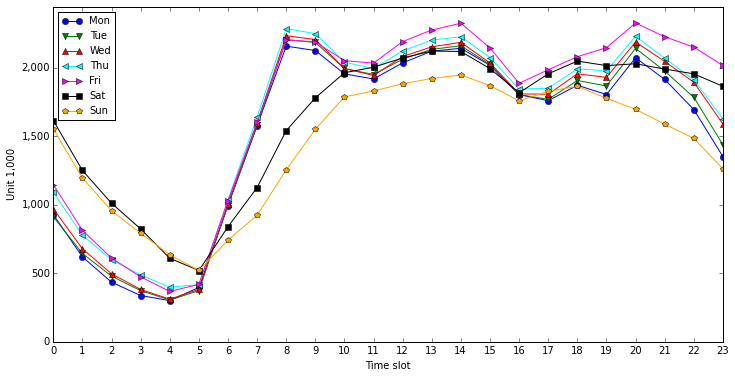

In [3]:
# Total Number of whole trips 
UNIT = 1000
hour_dow_totalNumTrip = wh_gb.sum()['num-tm'].to_frame('total-num-trip').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalNumTrip in hour_dow_totalNumTrip.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += totalNumTrip / UNIT

print xs
for ys in yss:
    print ys
    
multiple_line_chart((12, 6), '', 'Time slot', 'Unit 1,000', 
                    (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'wh_num_trips')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[12.462902849999999, 8.22153799, 5.5448841600000005, 4.4289786, 4.293000719999999, 6.15352153, 11.92302298, 22.438662670000003, 30.36162342, 22.07272334, 16.857844829999998, 15.965052550000001, 16.83738815, 17.76349304, 18.21568235, 17.27235374, 16.3694964, 22.37766198, 24.91964877, 21.81846289, 20.3814798, 19.79220411, 17.57596909, 13.91849397]
[12.253474189999999, 8.45154232, 6.10385761, 4.86889329, 4.28480753, 5.550753019999999, 11.42147491, 22.002580239999997, 30.84601941, 22.61638408, 17.05511695, 16.13785739, 16.99488678, 17.81241701, 18.338249140000002, 17.28707241, 16.35719838, 22.754653140000002, 25.64658691, 22.797476370000002, 21.274531670000002, 20.725571079999998, 18.87823989, 14.94457749]
[12.93835101, 8.89737061, 6.322787030000001, 4.9598189, 4.35647604, 5.71765098, 11.514706519999999, 22.153970440000002, 31.31432009, 22.98888214, 17.15947405, 16.21153931, 17.23932765, 18.0409683, 18.5

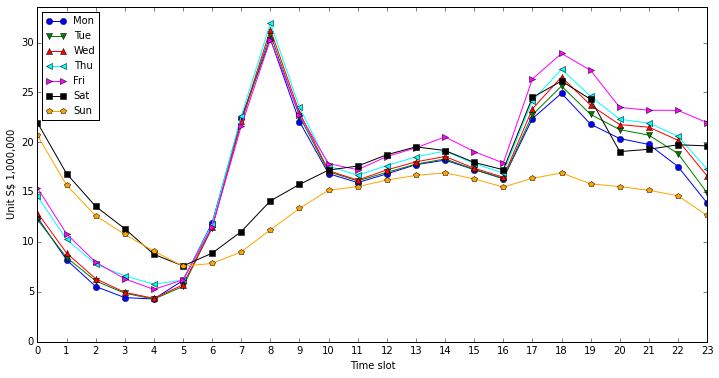

In [5]:
# Total fare of whole trips
UNIT = 1000000
hour_dow_totalFare = wh_gb.sum()['total-fare'].to_frame('total-fare').reset_index()
xs = range(len(TIME_SLOTS))
yss = [[0]*len(TIME_SLOTS) for _ in DAY_OF_WEEK]
for hour, dow, totalFare in hour_dow_totalFare.values:
    yss[DAY_OF_WEEK.index(dow)][hour] += (totalFare / CENT) / UNIT

print xs
for ys in yss:
    print ys
    
multiple_line_chart((12, 6), '', 'Time slot', 'Unit S$ 1,000,000', 
                    (xs, 0), yss, DAY_OF_WEEK, 'upper left', 'wh_fare_trips')